In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [8]:
print(len(train_data))
print(len(train_labels))

8982
8982


In [9]:
print(len(test_data))
print(len(test_labels))

2246
2246


In [11]:
# train_data[0]
train_labels[0]

np.int64(3)

In [16]:
print(train_data.shape)

(8982,)


In [15]:
print(train_labels.shape)

(8982,)


In [13]:
word_index = reuters.get_word_index()

reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_news = " ".join(reversed_word_index.get(i-3, "?") for i in train_data[0])
print(decoded_news)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [22]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.3373 - loss: 3.2833 - val_accuracy: 0.6290 - val_loss: 1.9456
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6736 - loss: 1.6820 - val_accuracy: 0.6890 - val_loss: 1.4250
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7268 - loss: 1.2829 - val_accuracy: 0.7280 - val_loss: 1.2328
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7681 - loss: 1.0456 - val_accuracy: 0.7420 - val_loss: 1.1254
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8052 - loss: 0.8785 - val_accuracy: 0.7590 - val_loss: 1.0556
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8454 - loss: 0.7142 - val_accuracy: 0.7860 - val_loss: 1.0014
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8741 - loss: 0.6061 - val_accuracy: 0.8060 - val_loss: 0.9438
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8965 - loss: 0.5004 - val_accuracy: 0.8100 - 

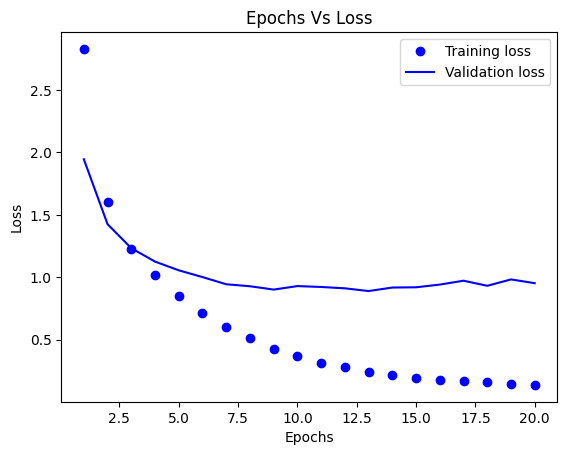

In [23]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs Vs Loss")
plt.legend()
plt.show()

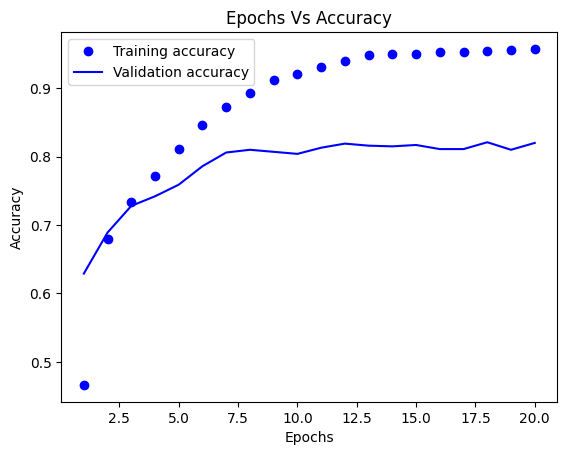

In [24]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs Vs Accuracy")
plt.legend()
plt.show()

In [25]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])


In [27]:
model.fit(x_train,
          y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9320 - loss: 0.3199 - val_accuracy: 0.9580 - val_loss: 0.2532
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9392 - loss: 0.2798 - val_accuracy: 0.9570 - val_loss: 0.2236
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9425 - loss: 0.2534 - val_accuracy: 0.9620 - val_loss: 0.2163
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9464 - loss: 0.2276 - val_accuracy: 0.9570 - val_loss: 0.1862
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9518 - loss: 0.1935 - val_accuracy: 0.9620 - val_loss: 0.1637
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9549 - loss: 0.1803 - val_accuracy: 0.9660 - val_loss: 0.1520
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9572 - loss: 0.1695 - val_accuracy: 0.9690 - val_loss: 0.1379
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9568 - loss: 0.1575 - val_accuracy: 0.9680 - val_loss:

In [28]:
results = model.evaluate(x_test, y_test)
# 80.69% accuracy

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8069 - loss: 0.9764


In [29]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()
# random baseline = chance rate = 19%

np.float64(0.19056099732858414)

In [30]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [32]:
np.sum(predictions[0])

np.float32(0.99999994)

In [31]:
predictions[0]

array([1.37076626e-07, 1.45191404e-06, 3.13368087e-09, 9.98676240e-01,
       9.47743014e-04, 1.51388346e-10, 2.55721915e-07, 3.10458347e-07,
       1.24715283e-04, 4.27619580e-06, 3.12925209e-07, 7.03759554e-07,
       1.15756402e-05, 3.17928425e-06, 4.57641647e-07, 1.44256305e-08,
       4.76339701e-05, 4.15593320e-07, 3.99148064e-07, 6.38114871e-05,
       4.11616202e-05, 1.84374621e-05, 8.41456043e-08, 5.72015279e-06,
       1.73513925e-07, 3.80047354e-08, 3.07849496e-10, 5.29146973e-07,
       2.62665168e-07, 7.29023577e-06, 5.88144667e-06, 1.61372853e-07,
       1.76305875e-07, 3.09390634e-06, 2.47808799e-07, 2.58322075e-07,
       1.92124435e-06, 2.74938703e-08, 2.49036329e-08, 2.89787477e-05,
       1.39463580e-07, 2.67844229e-07, 9.69075487e-08, 1.23169468e-06,
       8.09788574e-08, 3.44851081e-08], dtype=float32)

In [33]:
np.argmax(predictions[0])

np.int64(3)

In [34]:
test_labels[0]

np.int64(3)

In [35]:
model = keras.Sequential([
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.3351 - loss: 3.0182 - val_accuracy: 0.5090 - val_loss: 1.7943
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5971 - loss: 1.6018 - val_accuracy: 0.6810 - val_loss: 1.4948
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7030 - loss: 1.2673 - val_accuracy: 0.7010 - val_loss: 1.2623
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7629 - loss: 0.9986 - val_accuracy: 0.7530 - val_loss: 1.1160
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7891 - loss: 0.8586 - val_accuracy: 0.7600 - val_loss: 1.0684
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8407 - loss: 0.6541 - val_accuracy: 0.7820 - val_loss: 0.9894
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8583 - loss: 0.5511 - val_accuracy: 0.6850 - val_loss: 1.3778
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8584 - loss: 0.5461 - val_accuracy: 0.7830 - 

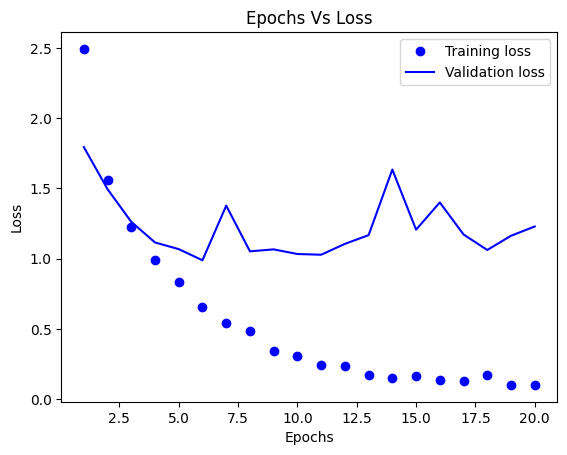

In [36]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs Vs Loss")
plt.legend()
plt.show()

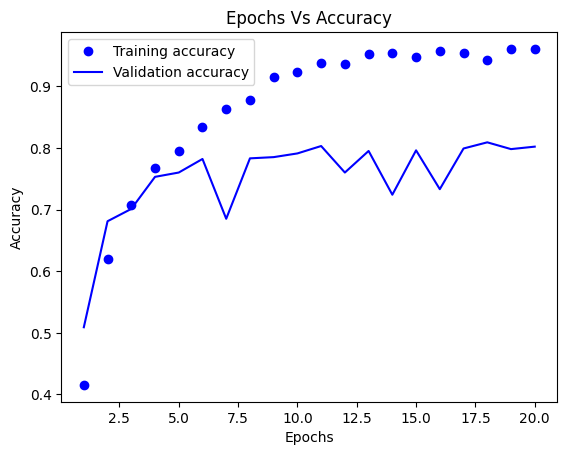

In [37]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs Vs Accuracy")
plt.legend()
plt.show()

In [38]:
model = keras.Sequential([
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(x_train,
          y_train,
          epochs = 10,
          batch_size = 512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, y_test)

# 80.53% accuracy

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.3216 - loss: 3.0052 - val_accuracy: 0.6220 - val_loss: 1.6954
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6265 - loss: 1.6122 - val_accuracy: 0.7060 - val_loss: 1.2359
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7089 - loss: 1.2219 - val_accuracy: 0.7360 - val_loss: 1.0312
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7554 - loss: 0.9837 - val_accuracy: 0.8050 - val_loss: 0.7867
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7861 - loss: 0.8368 - val_accuracy: 0.8370 - val_loss: 0.6901
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8340 - loss: 0.6610 - val_accuracy: 0.8940 - val_loss: 0.4485
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8675 - loss: 0.5147 - val_accuracy: 0.9020 - val_loss: 0.3741
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9074 - loss: 0.3660 - val_accuracy: 0.9430 - 